In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Data Onboarding
df = pd.read_csv("./ws1_data.csv", header=None)

In [2]:
df.shape

(100, 5)

In [3]:
df.head()

,0,1,2,3,4
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [4]:
df.nunique()

0    28
1    16
2    34
3    16
4     2
dtype: int64

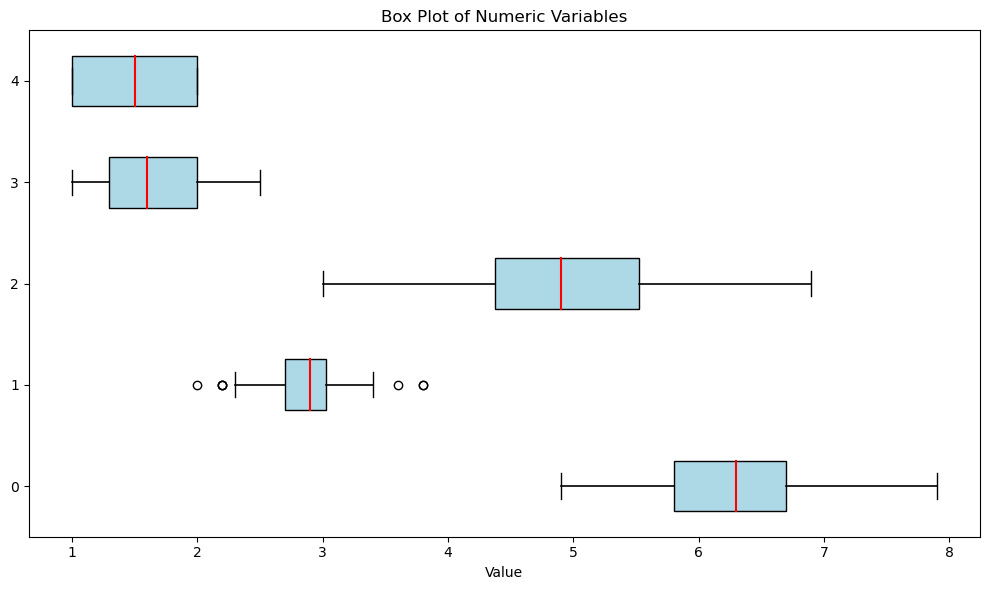

In [5]:
# Select numeric variables
numeric_variables = df.select_dtypes(include='number')

fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot for each numeric variable
box_plot = ax.boxplot(numeric_variables.values, vert=False, patch_artist=True)

for box in box_plot['boxes']:
    box.set(facecolor='lightblue')
for whisker in box_plot['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.2)
for median in box_plot['medians']:
    median.set(color='red', linewidth=1.5)

ax.set_yticklabels(numeric_variables.columns)

ax.set_xlabel('Value')
ax.set_title('Box Plot of Numeric Variables')

# Show the plot
plt.tight_layout()
plt.show()

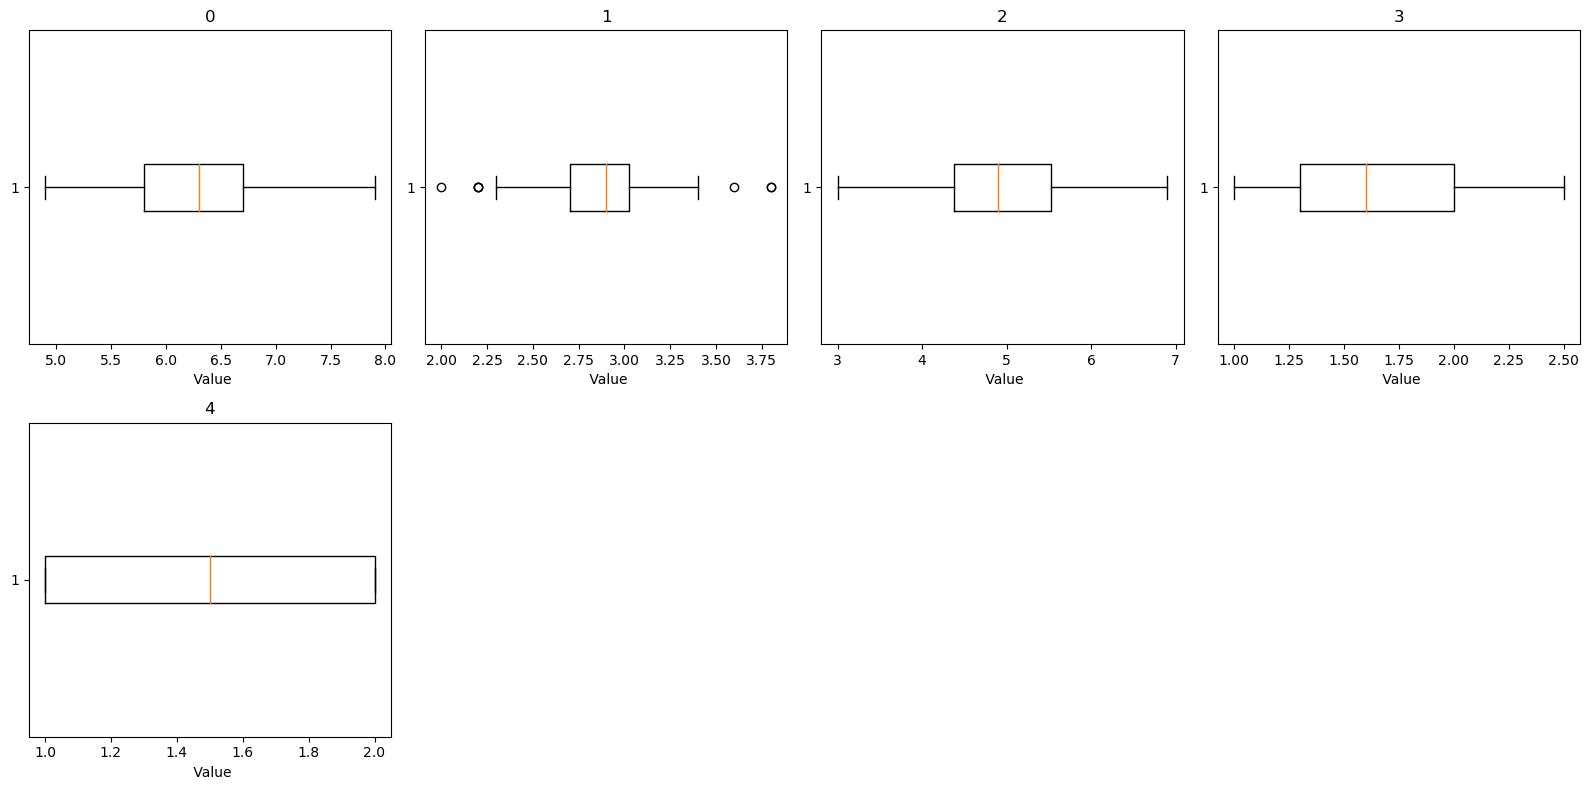

In [6]:
numeric_variables = df.select_dtypes(include='number')

column_names = numeric_variables.columns

# Subplots per row for better visualization
num_cols = 4
num_rows = len(column_names) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

if num_rows == 1:
    axes = axes.reshape(1, -1)

# Create box plots for each numeric variable
for i, column in enumerate(column_names):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]

    ax.boxplot(df[column], vert=False)
    ax.set_title(column)
    ax.set_xlabel(' Value')

for i in range(len(column_names), num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [7]:
# Count values in each column
df.count()

0    100
1    100
2    100
3    100
4    100
dtype: int64

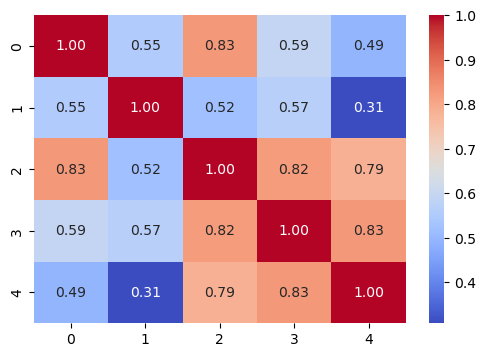

In [8]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

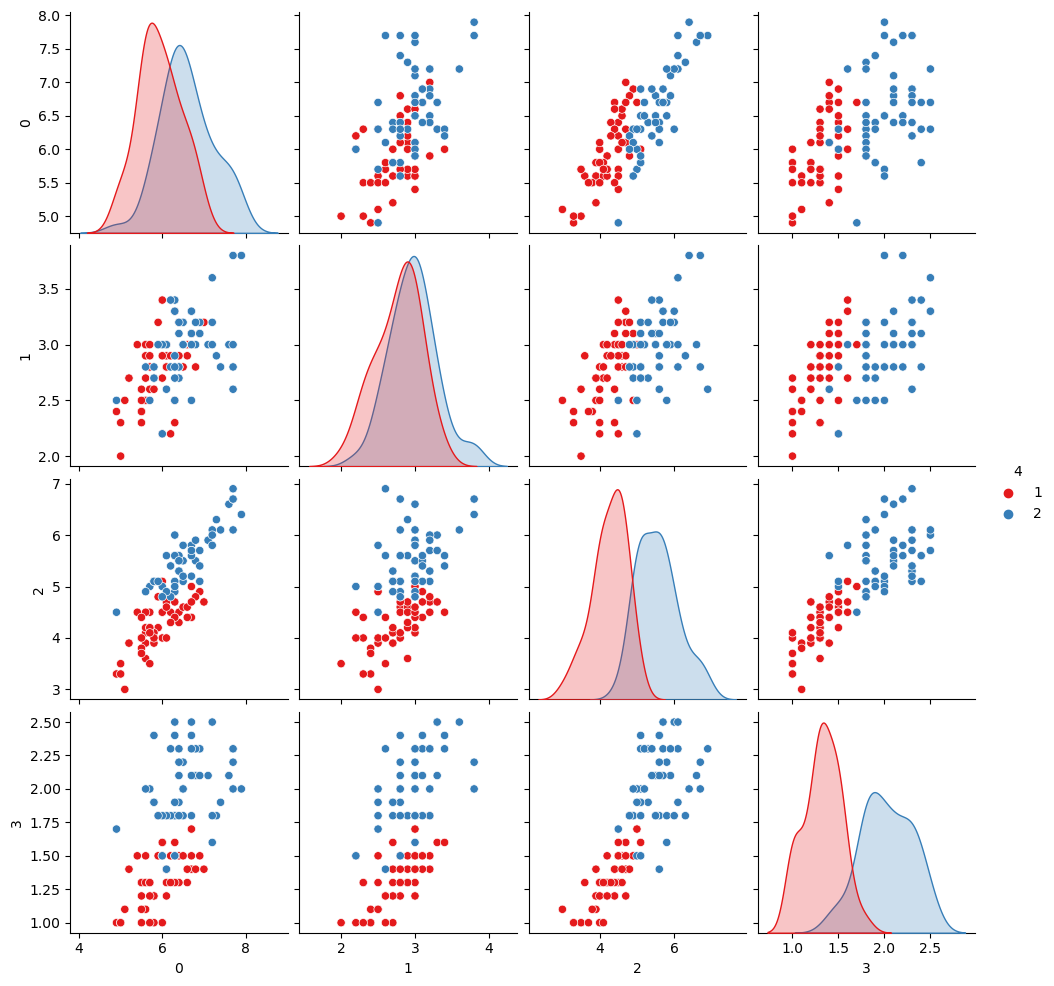

In [9]:
# Create a pairplot to visualize pairwise feature distributions
sns.pairplot(df, diag_kind='kde', markers='o', hue=4, palette='Set1')
plt.show()

In [10]:
# Take all features except target
X = df.drop(4, axis=1)

# Take the target variable out
y = df[4] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Optional: Data Normalization (Min-Max Normalization)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection (Enumerate feature combinations)
def select_best_features(X_train, X_test, y_train, y_test, num_features):
    best_accuracy = 0
    best_feature_set = None
    
    for num in range(1, num_features + 1):
        feature_combinations = combinations(range(X_train.shape[1]), num)
        
        for feature_set in feature_combinations:
            
            selected_features = X_train[:, feature_set], X_test[:, feature_set]
            
            # Data Modeling
            model = GaussianNB()
            model.fit(selected_features[0], y_train)
            
            # Statistical Classification
            predictions = model.predict(selected_features[1])
            
            # Performance Evaluation
            accuracy = accuracy_score(y_test, predictions)
            print("Accuracy: {} Feature set: {}".format(accuracy, feature_set))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature_set = feature_set
    
    return best_feature_set

# Specify the desired number of features
desired_num_features = 4

# Call the feature selection function
best_feature_set = select_best_features(X_train, X_test, y_train, y_test, desired_num_features)

# Print the best feature combination
print(f"Best Feature Combination: {best_feature_set}")

# Train the final model using the best feature combination
final_selected_features = X_train[:, best_feature_set], X_test[:, best_feature_set]
final_model = GaussianNB()
final_model.fit(final_selected_features[0], y_train)

# Evaluate the final model on the test set
final_predictions = final_model.predict(final_selected_features[1])
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Classification Accuracy: {final_accuracy}")

Accuracy: 0.65 Feature set: (0,)
Accuracy: 0.5 Feature set: (1,)
Accuracy: 0.85 Feature set: (2,)
Accuracy: 0.95 Feature set: (3,)
Accuracy: 0.65 Feature set: (0, 1)
Accuracy: 0.75 Feature set: (0, 2)
Accuracy: 0.95 Feature set: (0, 3)
Accuracy: 0.85 Feature set: (1, 2)
Accuracy: 0.95 Feature set: (1, 3)
Accuracy: 0.9 Feature set: (2, 3)
Accuracy: 0.75 Feature set: (0, 1, 2)
Accuracy: 0.95 Feature set: (0, 1, 3)
Accuracy: 0.95 Feature set: (0, 2, 3)
Accuracy: 0.95 Feature set: (1, 2, 3)
Accuracy: 0.95 Feature set: (0, 1, 2, 3)
Best Feature Combination: (3,)
Final Classification Accuracy: 0.95


In [12]:
best_feature_names = [column_names[i] for i in best_feature_set]

In [13]:
best_feature_names

[3]